## Simple Linear Regression

In [6]:
import pandas as pd
ad = pd.read_csv("Advertising.csv")
# ad = pd.read_csv("Advertising.csv", usecols = [1,2,3,4])

In [2]:
df = ad.copy()

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df = df.iloc[:,1:len(df)]

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [10]:
df.isnull().values.any()

False

In [11]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


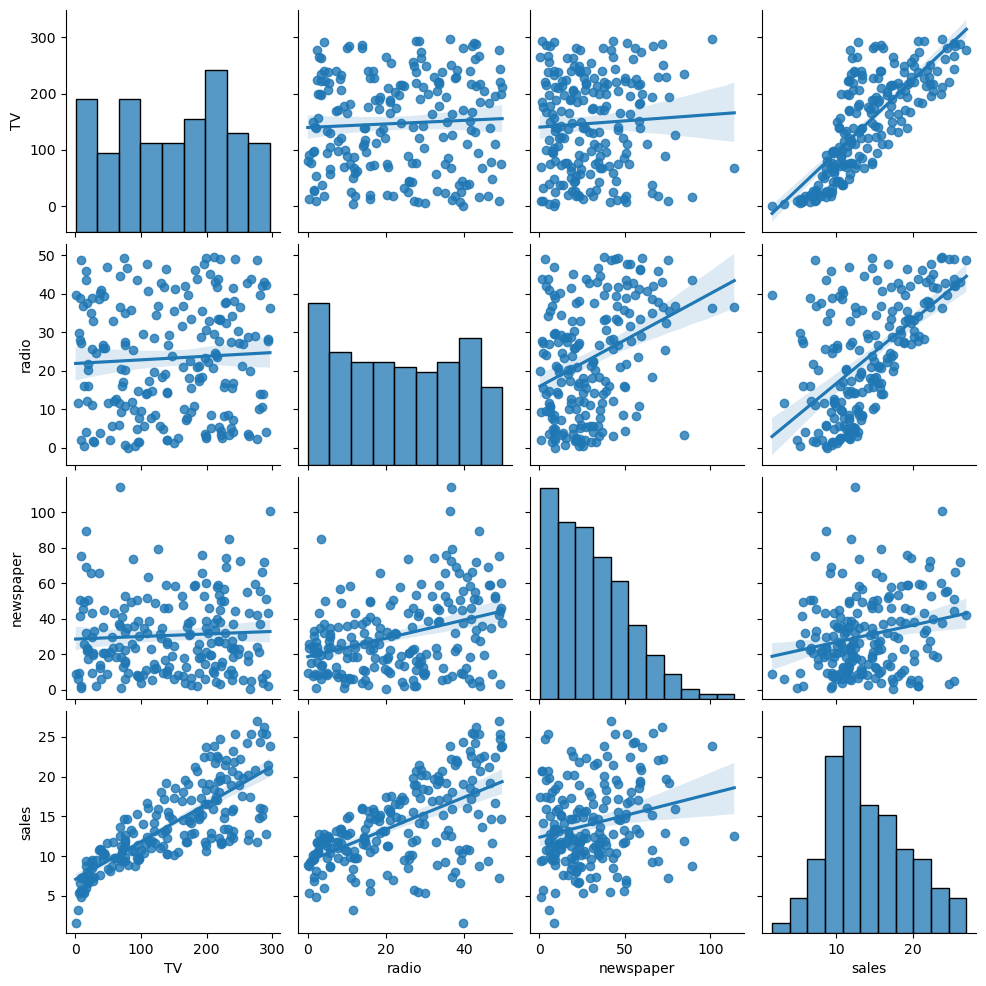

In [13]:
import seaborn as sns
sns.pairplot(df, kind= "reg");

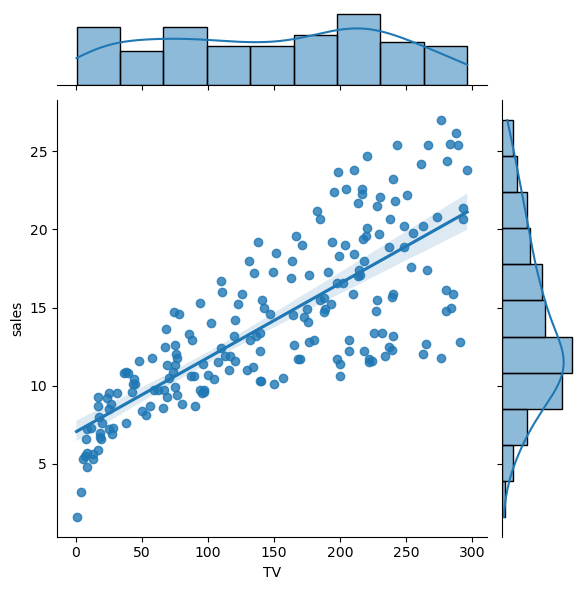

In [14]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

## Modeling with Statsmodels

In [16]:
import statsmodels.api as sm

In [15]:
X = df[["TV"]]
X[:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [17]:
X = sm.add_constant(X)

In [18]:
X[:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [20]:
y = df["sales"]

In [21]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [22]:
lm = sm.OLS(y,X)

In [23]:
model = lm.fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           1.47e-42
Time:                        20:19:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
import statsmodels.formula.api as smf

In [27]:
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           1.47e-42
Time:                        20:25:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [29]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [30]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [32]:
model.f_pvalue

1.467389700194647e-42

In [33]:
print("f_pvalue: ", "%.3f" % model.f_pvalue)

f_pvalue:  0.000


In [34]:
print("f_value: ", "%.3f" % model.fvalue)

f_value:  312.145


In [36]:
print("t_value: ", "%.3f" % model.tvalues[:1])

t_value:  15.360


In [37]:
model.mse_model

3314.618166868649

In [38]:
model.rsquared

0.611875050850071

In [40]:
model.rsquared_adj

0.6099148238341623

In [41]:
model.fittedvalues[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [42]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [45]:
print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1])) 

Sales = 7.03 + TV*0.05


Text(0.5, 0, 'TV Spending')

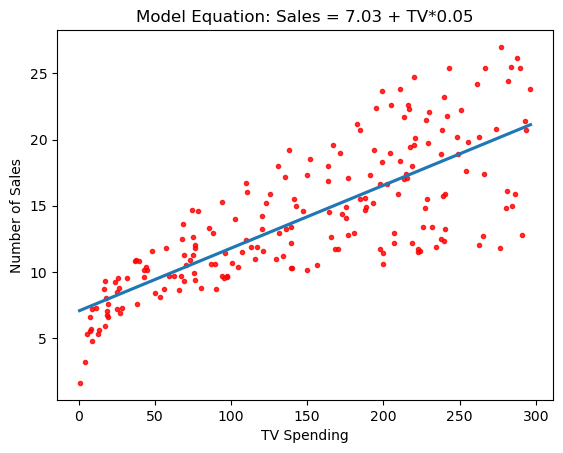

In [50]:
g = sns.regplot(x = df["TV"], y = df["sales"], ci = None, scatter_kws = {'color':'r', 's':9})
g.set_title("Model Equation: Sales = 7.03 + TV*0.05")
g.set_ylabel("Number of Sales")
g.set_xlabel("TV Spending")
#plt.xlim(-10,310)
#plt.ylim(bottom = 0);

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_

7.032593549127694

In [53]:
model.coef_

array([0.04753664])

In [54]:
model.score(X,y)

0.611875050850071

In [55]:
model.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

# Guess

## Model Equation

Sales = 7.03 + TV*0.05

For example, what is the estimated value of sales when 30 units of TV are spent?

In [56]:
7.03 + 30*0.04

8.23

In [57]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)

In [58]:
model.predict([[30]])

C:\Users\tahar\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [62]:
new_data = [[5],[90],[200]]

In [63]:
model.predict(new_data)

C:\Users\tahar\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])

# Leftovers and Its Importance in Machine Learning

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
lm = smf.ols("sales~TV", df)

In [67]:
model = lm.fit()

In [68]:
mse = mean_squared_error(y, model.fittedvalues)

In [69]:
mse

10.512652915656753

In [70]:
import numpy as np
rmse = np.sqrt(mse)

In [71]:
rmse

3.2423221486546883

In [72]:
reg.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [73]:
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [74]:
k_t = pd.DataFrame({"real_y": y[:10],
                   "guess_y": reg.predict(X)[:10]})

In [75]:
k_t

,real_y,guess_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [76]:
k_t["error"] = k_t["real_y"] - k_t["guess_y"]

In [77]:
k_t

,real_y,guess_y,error
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [79]:
k_t["error_sqr"] = k_t["error"]**2

In [80]:
k_t

,real_y,guess_y,error,error_sqr
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [81]:
np.sum(k_t["error_sqr"])

92.90350329638105

In [82]:
np.mean(k_t["error_sqr"])

9.290350329638105

In [83]:
np.sqrt(np.mean(k_t["error_sqr"]))

3.048007599996776

In [84]:
model.resid[:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

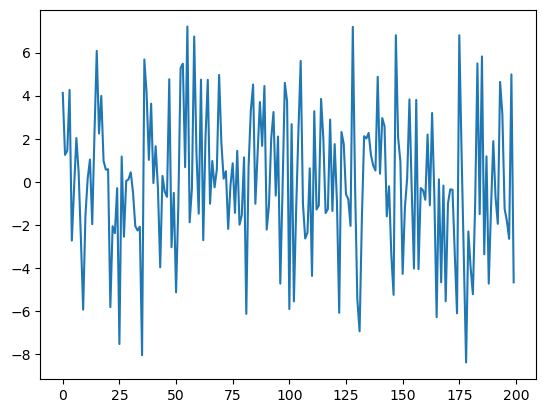

In [88]:
import matplotlib.pyplot as plt 
plt.plot(model.resid);